In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [25]:
df = pd.DataFrame({'task': ['A', 'B', 'C', 'D', 'E'],
                  'Description': ['Arima Model', 'NN Model', 'Clustering Daily Pattern', 'Adding more features', 'Deployment Readme and presentation'],
                  'start': pd.to_datetime(['23 Nov 2022', '24 Nov 2022', '26 Nov 2022',   '27 Nov 2022',         '28 Nov 2022']),
                  'end': pd.to_datetime(['24 Nov 2022', '25 Nov 2022', '26 Nov 2022',    '27 Nov 2022',          '29 Nov 2022']),
                  'completion_frac': [ 0.99, 0.5, 0, 0, 0]})
#print(df)

In [26]:
df['days_to_start'] = (df['start'] - df['start'].min()).dt.days

df['days_to_end'] = (df['end'] - df['start'].min()).dt.days

df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1  # to include also the end date

df['completion_days'] = df['completion_frac'] * df['task_duration']

df

,task,Description,start,end,completion_frac,days_to_start,days_to_end,task_duration,completion_days
0,A,Arima Model,2022-11-23,2022-11-24,0.99,0,1,2,1.98
1,B,NN Model,2022-11-24,2022-11-25,0.50,1,2,2,1.00
2,C,Clustering Daily Pattern,2022-11-26,2022-11-26,0.00,3,3,1,0.00
3,D,Adding more features,2022-11-27,2022-11-27,0.00,4,4,1,0.00
4,E,Deployment Readme and presentation,2022-11-28,2022-11-29,0.00,5,6,2,0.00


In [27]:
xticks = np.arange(1, df['days_to_end'].max() + 7, 1)

xticklabels = pd.date_range(start=df['start'].min() , end=df['end'].max()+ dt.timedelta(days=5)).strftime("%d/%m")


tasks_colors = {'Arima Model': 'c', 'NN Model': 'm', 'Clustering Daily Pattern': 'y', 'Adding more features': 'b', 'Deployment Readme and presentation':'g'}
 
patches = []
for team in tasks_colors:
    patches.append(matplotlib.patches.Patch(color=tasks_colors[team]))

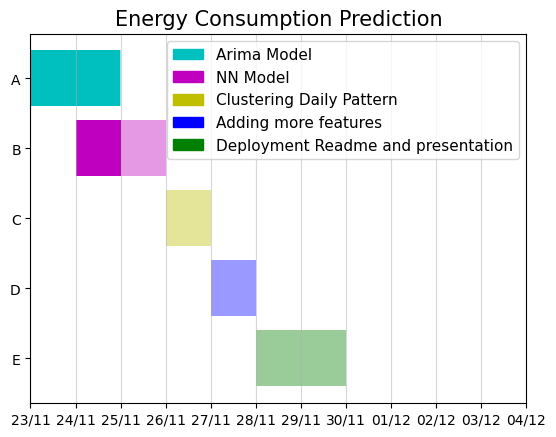

In [28]:
fig, ax = plt.subplots()

for index, row in df.iterrows():

    # Adding a lower bar - for the overall task duration
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=tasks_colors[row['Description']], alpha=0.4)

    # Adding an upper bar - for the status of completion
    plt.barh(y=row['task'], width=row['completion_days'], left=row['days_to_start'] + 1, color=tasks_colors[row['Description']])

plt.title('Energy Consumption Prediction', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::1])
ax.xaxis.grid(True, alpha=0.5)
ax.legend(handles=patches, labels=tasks_colors.keys(), fontsize=11)
plt.savefig('timeline_pic.png')
plt.show()